In [1]:
import os
os.chdir('..')


In [2]:

import nmrglue as ng
import numpy as np
from cops_analysis import cops_analyze
from cops_prediction import gaussian
from cops_prediction import int_seq_match
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering

In [3]:

b = cops_analyze(['./pyruvate_HNCA/HNCA_nocop.ft3','./pyruvate_HNCA/HNCA_cop1.ft3','./pyruvate_HNCA/HNCA_cop3.ft3','./pyruvate_HNCA/HNCA_cop4.ft3','./pyruvate_HNCA/HNCA_cop5.ft3','./pyruvate_HNCA/HNCA_cop6.ft3'], mode='HNCA',pyruvate_on=True)
tb_nopyr=pd.read_fwf('./files/GB1_new.shifts', infer_nrows=300)
tb_nopyr = tb_nopyr.rename(columns={'w1':'CA','w2':'N', 'w3':'HN'})

#realign spectra
tb_nopyr = tb_nopyr.set_index(tb_nopyr['Assignment'])
tb_nopyr['is_sequential']=np.append([False], [len(tb_nopyr['Assignment'][i+1]) > len(tb_nopyr['Assignment'][i]) for i in range(len(tb_nopyr)-1)])
#tb_nopyr.loc[tb_nopyr['is_sequential'],'CA']=tb_nopyr[~tb_nopyr['is_sequential']][['CA']][:-1].to_numpy() #enforce the same CA

shifts_array = tb_nopyr[['CA','N', 'HN']].to_numpy(dtype=np.float32)
shifts_array[:,[0,1]]=shifts_array[:,[1,0]]

#dslice_cop_nopyr = np.array([np.array([b.extract1D(shifts_array[j], b.cop_dats[i], b.cop_unit_convs[i],sw=80, normalize=True)[1] for i in range(len(b.cop_nums))]).reshape(-1) for j in range(len(shifts_array))])
#dslice_cop_nopyr.shape

D21Ca-N-HN
[115.789  49.417   7.163]


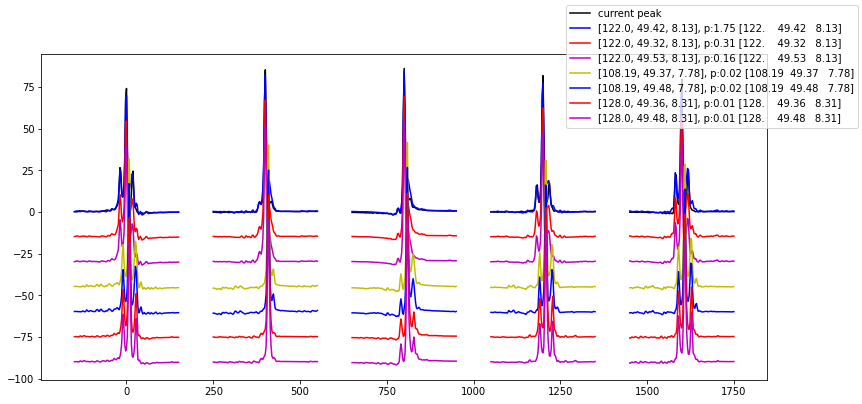

In [4]:
#a = int_seq_match(b, cops_mode='HNCA')
a = int_seq_match(b, peak_table_dir = './files/GB1_new.shifts', cops_mode='HNCA')
print(tb_nopyr['Assignment'][40])
print(shifts_array[40])
fig = a.find_best_matches(shifts_array[40], snr=25,gen_plot=True, verbose=True, sequential_mode=True)

Q31Ca-N-HN
[120.345  55.483   7.275]


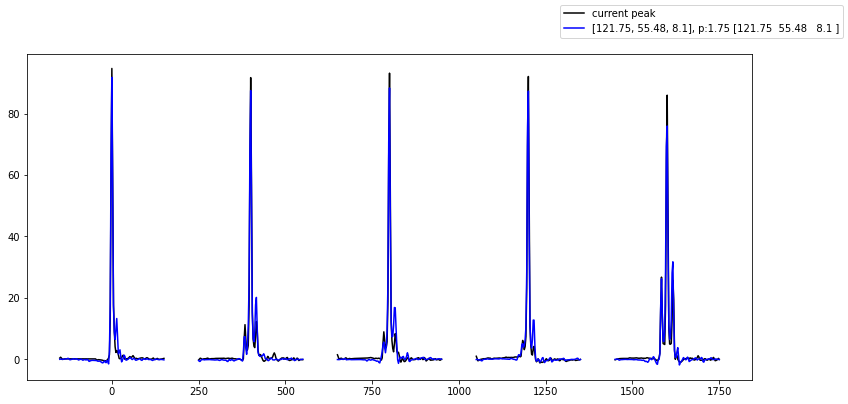

In [5]:
peaknum = 60
print(tb_nopyr['Assignment'][peaknum])
print(shifts_array[peaknum])
fig = a.find_best_matches(shifts_array[peaknum], snr=25,gen_plot=True, sequential_mode=True, verbose=True)

Q31Ca-Y32N-HN
[121.731  55.485   8.105]


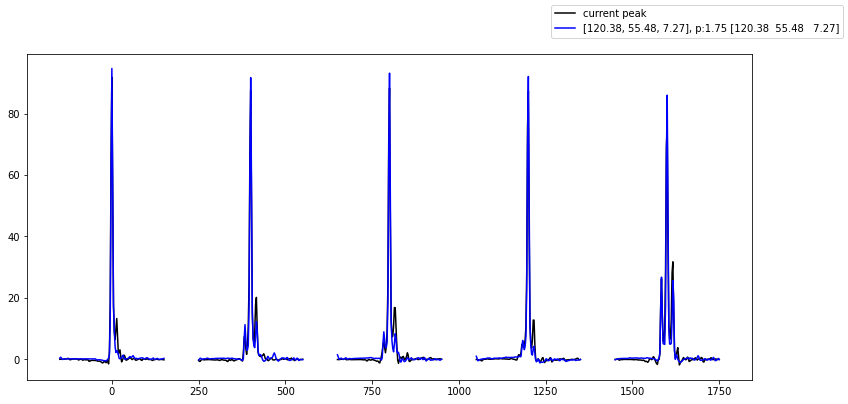

In [6]:
print(tb_nopyr['Assignment'][peaknum+1])
print(shifts_array[peaknum+1])
fig = a.find_best_matches(shifts_array[peaknum+1], snr=25,gen_plot=True, sequential_mode=False, verbose=True)